A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

--> Types of Smoke Detectors

- Photoelectric Smoke Detector
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.

- Ionization Smoke Detector
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current difference has developed between the open and sealed chambers, and sounds the alarm

# 0. Dataset loading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
! gdown --id 1sTHR7XbwMLvMYxjYVf3u4slNOAb9YFS8

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sTHR7XbwMLvMYxjYVf3u4slNOAb9YFS8
To: /content/smoke_detection_iot.csv
100% 5.83M/5.83M [00:00<00:00, 121MB/s]


In [ ]:
filename = 'smoke_detection_iot.csv'
data = pd.read_csv(filename)
data.drop("Unnamed: 0",axis = 1,inplace = True)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Collection of training data is performed with the help of IOT devices since the goal is to develop a AI based smoke detector device.
Many different environments and fire sources have to be sampled to ensure a good dataset for training. The data was captured in different scenario (outdoor, indoor ecc.)

The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. To keep track of the data, a UTC timestamp is added to every sensor reading.
Columns:
- Timestamp UTC seconds
- Air Temperature
- Air Humidity
- Total Volatile Organic compounds
- co2 equivalent concentration
- Raw molecular hydrogen+
- Raw ethanol gas
- Air pressure
- particulate matter size < 1 µm
- particulate matter size < 2.5 µm
- Number concentration of particulate matter (NC) at 3 different dimensions (0.5,1,2.5)
- Sampel counter
- Ground truth --> 1 means that a fire is there.

In [ ]:
array = np.array(data)
X = array[:,:-1]     #feature vector
Y = array[:,-1]      #classes

In [ ]:
X[:1]

array([[1.65473333e+09, 2.00000000e+01, 5.73600000e+01, 0.00000000e+00,
        4.00000000e+02, 1.23060000e+04, 1.85200000e+04, 9.39735000e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [ ]:
Y[:5]

array([0., 0., 0., 0., 0.])

# 1. Exploring the dataset

## First look

In [ ]:
data.shape

(62630, 15)

In [ ]:
data.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [ ]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


The are no missing values. The features are clearly on different scales, some modifications are needed. 

Temperature column is the only one having also negative values.

In [ ]:
data.groupby("Fire Alarm").size()

Fire Alarm
0    17873
1    44757
dtype: int64

Classes seems to be skewed, with the number of positives that is way bigger than the negatives.

## Plots

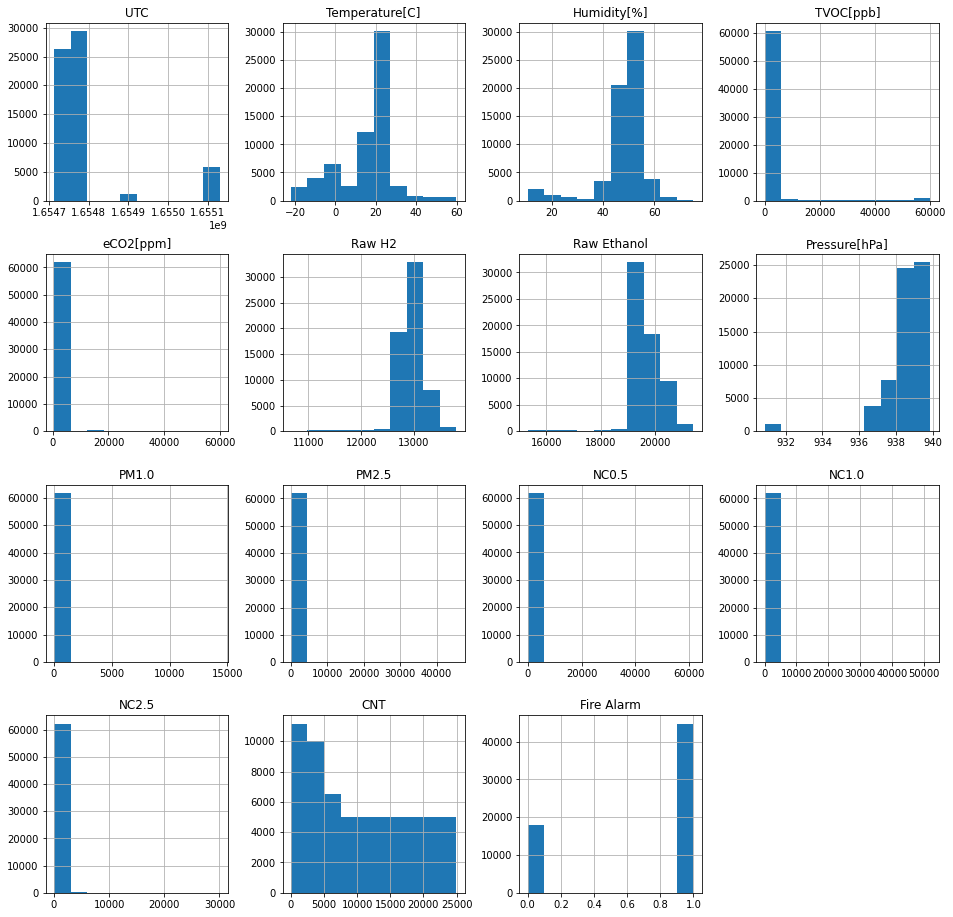

In [ ]:
data.hist()                                        
plt.rcParams["figure.figsize"] = [16,16]  
plt.show()

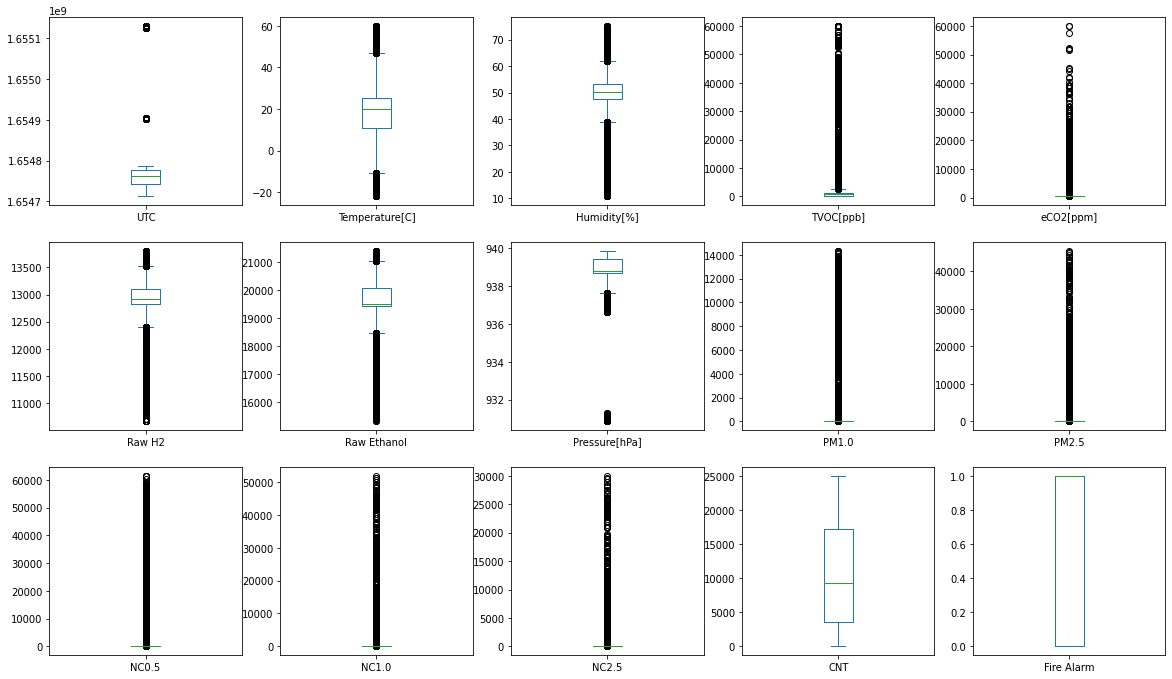

In [ ]:
data.plot(kind='box',layout = (5,5),subplots=True, sharex=False, sharey=False)
plt.show()

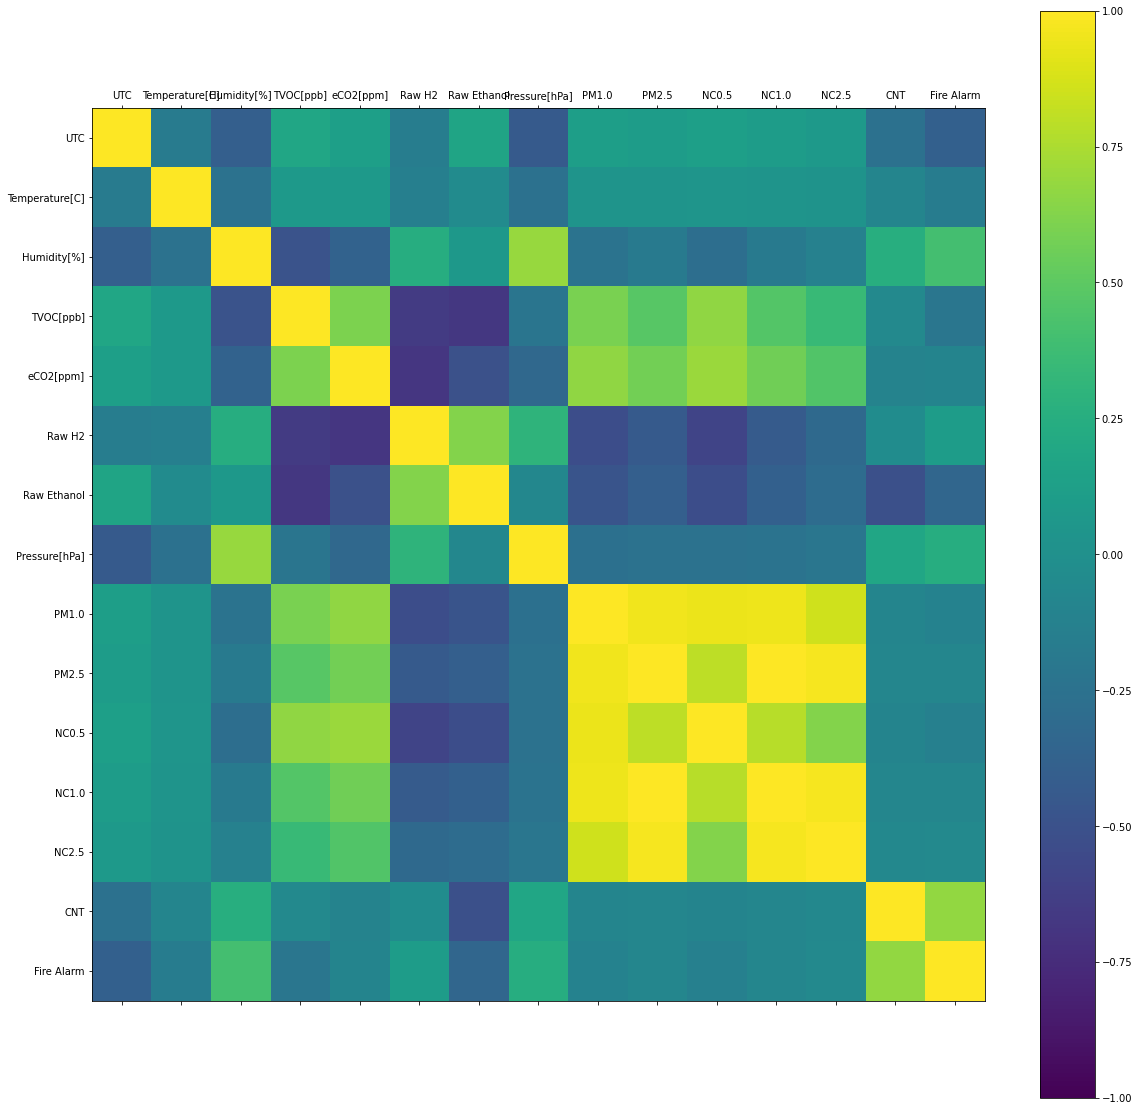

In [ ]:
correlations = data.corr(method='pearson')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

From the hitmap some correlations are highlited:
- like one would expect, the particulate counts and concentrations are strongly correlated within each other (NC and PM).
- Seems that the fire alarm it's mostly correlated to the sample counter cnt, and a little bit to humidity
- Good relation between humidity and pressure.
- Good relation between H2 and ethanol
- Good relation between particulates and both co2 and TVOC (understandable)

In [ ]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data)
#plt.show()

# 2. Data preparation

We apply a normalization since data are on different scales, and the distribution does not resemble a gaussian.

In [ ]:
from sklearn.preprocessing import normalize
X = normalize(X)
X

array([[1.00000000e+00, 1.20865396e-08, 3.46641957e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.20956045e-08, 3.42472100e-08, ...,
        0.00000000e+00, 0.00000000e+00, 6.04326982e-10],
       [1.00000000e+00, 1.21040651e-08, 3.38181379e-08, ...,
        0.00000000e+00, 0.00000000e+00, 1.20865396e-09],
       ...,
       [1.00000000e+00, 1.13991043e-08, 9.57024495e-09, ...,
        3.72780375e-10, 8.45854983e-12, 3.46860961e-06],
       [1.00000000e+00, 1.15296076e-08, 9.69108137e-09, ...,
        3.69155282e-10, 8.45854983e-12, 3.46921379e-06],
       [1.00000000e+00, 1.16601109e-08, 9.98108879e-09, ...,
        3.66738553e-10, 8.45854982e-12, 3.46981797e-06]])

# 3. Feature selection


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
#Recursive feature elimination
model = LogisticRegression(solver='lbfgs', max_iter=5000)

rfe = RFE(model, n_features_to_select=3)   # my choice: seek for 3 features
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Features %s" % data.columns[:-1])

Num Features: 3
Selected Features: [ True False False  True False False False False False False False False
 False  True]
Feature Ranking: [ 1 12 11  1  5  3  7 10  8  6  2  4  9  1]
Features Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT'],
      dtype='object')


In [ ]:
# Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
#model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_,"\n",data.columns[:-1])

[0.         0.         0.         0.11478438 0.0315846  0.08874614
 0.18613535 0.         0.00346322 0.00318175 0.00597751 0.00273705
 0.001027   0.56236301] 
 Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT'],
      dtype='object')


Both method selects CNT and TVOC as some of the most important features. This is reasonable, since we noted that the feature with the strongest relation to the fire alarm was exactly the CNT.

First method selects also UTC, while second one selects Ehanol.

I will start selecting these 4, and then see what to do.


In [ ]:
data_sel = data[["UTC","TVOC[ppb]","Raw Ethanol","CNT"]]
#data_sel.head()
X_sel = np.array(data_sel)
X_sel

array([[1654733331,          0,      18520,          0],
       [1654733332,          0,      18651,          1],
       [1654733333,          0,      18764,          2],
       ...,
       [1655130049,        627,      20582,       5741],
       [1655130050,        638,      20566,       5742],
       [1655130051,        643,      20543,       5743]])

# 4. Resampling
Applying k-fold cross validation to the dataset.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  

In [ ]:
# Evaluate using Cross Validation
num_folds = 5
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
#model = LogisticRegression()
model = LogisticRegression(solver='lbfgs', max_iter=500)
results = cross_val_score(model, X_sel, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 71.463% (0.209%)


The accuracy is not that good, let's try with different algorithms.

# 5. Algorithm selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier                             # <---
from sklearn.neighbors import KNeighborsClassifier                          # <---
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis        # <---
from sklearn.naive_bayes import GaussianNB                                  # <---
from sklearn.svm import SVC 

In [ ]:
# Compare Algorithms

# prepare models
models = []
models.append(( 'LR'   , LogisticRegression(solver='lbfgs', max_iter=500)))    # avoid warnings with (solver='lbfgs', max_iter=500)
models.append(( 'LDA'  , LinearDiscriminantAnalysis()))
models.append(( 'KNN'  , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB'   , GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=5, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_sel, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.714626 (0.002095)
LDA: 0.923312 (0.002043)
KNN: 0.999808 (0.000119)
CART: 0.999872 (0.000039)
NB: 0.874214 (0.002312)


Almost perfect accuracy with KNN and CART!

# 6. Performance metrics

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report 

In [ ]:
seed = 7
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
model2 = KNeighborsClassifier()
model = DecisionTreeClassifier()

## Logloss

In [ ]:
scoring = 'neg_log_loss' 

results = cross_val_score(model, X_sel, Y, cv=kfold, scoring=scoring)
print("CART Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

CART Logloss: -0.005 (0.002)


In [ ]:
results = cross_val_score(model2, X_sel, Y, cv=kfold, scoring=scoring)
print("KNN Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

KNN Logloss: -0.004 (0.004)


The 2 algorithms are almost equal.

## Accuracy

In [ ]:
#With outlier
scoring = 'accuracy'                                            
results = cross_val_score(model, X_sel, Y, cv=kfold, scoring=scoring)
print("CART Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 

CART Accuracy: 1.000 (0.000)


In [ ]:
#Now we check if removing the outliers makes some difference:
scoring = 'accuracy'                                            
results = cross_val_score(model2, X_sel, Y, cv=kfold, scoring=scoring)
print("KNN Accuracy: %.3f (%.3f)" % (results.mean(), results.std())) 

KNN Accuracy: 1.000 (0.000)


No difference after the outlier removal in this case.

## Roc Curve

In [ ]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = cross_val_score(model, X_sel, Y, cv=kfold, scoring=scoring)
print("CART AUC: %.3f (%.3f)" % (results.mean(), results.std()))

CART AUC: 1.000 (0.000)


In [ ]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = cross_val_score(model2, X_sel, Y, cv=kfold, scoring=scoring)
print("KNN AUC: %.3f (%.3f)" % (results.mean(), results.std()))

KNN AUC: 1.000 (0.000)


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
test_size = 0.33

# Cross Validation Classification Confusion Matrix
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y, test_size=test_size, random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix1 = confusion_matrix(Y_test, predicted)              # <---
print(matrix1)

[[ 5888     2]
 [    2 14776]]


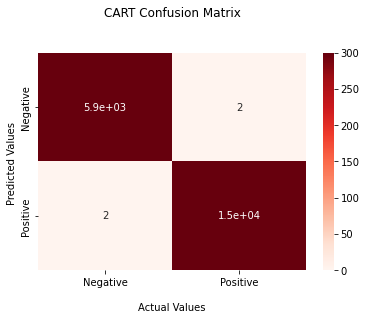

In [ ]:
ax = sns.heatmap(matrix1, annot=True, cmap="Reds", vmin=0, vmax=300)

ax.set_title('CART Confusion Matrix\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
#plt.savefig('High_CM.png', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
test_size = 0.33

# Cross Validation Classification Confusion Matrix
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y, test_size=test_size, random_state=seed)
model2.fit(X_train, Y_train)
predicted = model2.predict(X_test)
matrix2 = confusion_matrix(Y_test, predicted)              # <---
print(matrix2)

[[ 5889     1]
 [    2 14776]]


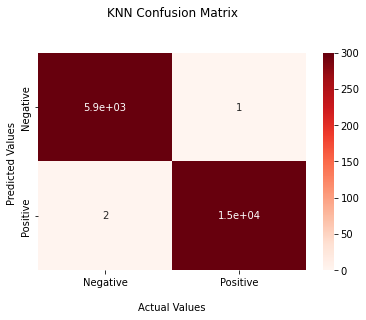

In [ ]:
ax = sns.heatmap(matrix2, annot=True, cmap="Reds", vmin=0, vmax=300)

ax.set_title('KNN Confusion Matrix\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
#plt.savefig('High_CM.png', dpi = 300, bbox_inches='tight')
plt.show()

## Classification Report


In [ ]:
#CART
test_size = 0.33
seed = 7

#Report generated with the train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y, test_size=test_size,
    random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)               # <---
print(report)                  

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5890
         1.0       1.00      1.00      1.00     14778

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668



In [ ]:
#KNN
test_size = 0.33
seed = 7

#Report generated with the train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sel, Y, test_size=test_size,
    random_state=seed)
model2.fit(X_train, Y_train)
predicted = model2.predict(X_test)
report = classification_report(Y_test, predicted)               # <---
print(report)  

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5890
         1.0       1.00      1.00      1.00     14778

    accuracy                           1.00     20668
   macro avg       1.00      1.00      1.00     20668
weighted avg       1.00      1.00      1.00     20668

